# 2.2 Data Preprocessing

## Exercises

### Q1. Why is the second derivative much more expensive to compute than the first derivative?

To compute the first derivative, chain rule is applied on the function in question. The first derivative is the product of various partial derivatives chained together. Now, to calculate the second derivative, we need to apply the product rule on the the result, which can grow very quickly in terms of the computation required.

### Q2. After running the function for backpropagation, immediately run it again and see what happens.

In [1]:
import torch

In [2]:
x = torch.arange(4.0, requires_grad=True)
y = 2 * torch.dot(x, x)

In [3]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [4]:
x.grad.zero_()
y.backward()
x.grad

RuntimeError: Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling .backward() or autograd.grad() the first time.

When the `backward()` is called on a variable, PyTorch backward passes through the computation graph and calculates the gradient for us. But as soon as the gradients are calculated, the info about the gradients and the graph is freed from the memory. Hence another backward pass is not possible since PyTorch has no information about the computation graph. To avoid this default behaviour, we can set `retain_graph=True` the first time we use `backward()`

### Q3. In the control flow example where we calculate the derivative of `d` with respect to `a`, what would happen if we changed the variable `a` to a random vector or matrix. At this point, the result of the calculation `f(a)` is no longer a scalar. What happens to the result? How do we analyze this?

In [5]:
import torch

In [6]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [7]:
a = torch.randn(size=(3,), requires_grad=True)
d = f(a)
## This fails
d.backward()
a.grad()

RuntimeError: grad can be implicitly created only for scalar outputs

In [8]:
## This works
d.sum().backward()
a.grad

tensor([102400., 102400., 102400.])

### Q4. Redesign an example of finding the gradient of the control flow. Run and analyze the result.

### Q5. Let $f(x) = sin(x)$. Plot $f(x)$ and $\frac{df(x)}{dx}$ , where the latter is computed without exploiting that $f′(x) = cos(x)$

In [9]:
import torch
import matplotlib.pyplot as plt

In [10]:
def f(x):
    return torch.sin(x)

In [11]:
x = torch.arange(0, 8, 0.1, requires_grad=True)
f = torch.sin(x)
f.sum().backward()
f_dash = x.grad

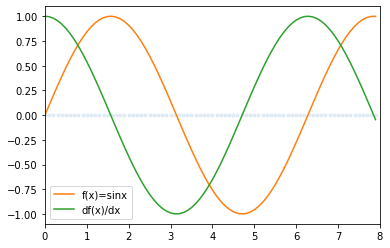

In [12]:
plt.plot(x.detach().numpy(), torch.zeros_like(x), '.', alpha=0.1)
plt.plot(x.detach().numpy(), f.detach().numpy(), label="f(x)=sinx")
plt.plot(x.detach().numpy(), f_dash.detach().numpy(), label="df(x)/dx")
plt.legend()
plt.xlim(0, 8);